# Introduction to Artificial Neural Nerworks - Part 1/3

### Welcome to this short tutorial!
The general idea of this series is to build an Artificial Neural Network from scratch starting with its fundamental unit, the Perceptron, and then slowly add elements until we can build and use a pretrained Neural Network ready to apply to complex tasks. During the process we'll explain each stage as accessibly as possible.

It is a long topic, so we'll be dividing it in smaller parts to make it easier to handle.

What you need to know before starting:
 - Basic Python programming skills
 - Basic knowledge of linear algebra

Now, let's begin!

## Imports

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
plt.rcParams['figure.dpi'] = 100
sns.set_style('darkgrid')

In [22]:
random.seed(66)

## **Perceptron**

*Rosenblatt's perceptron (1962)* is a **binary classification algorithm** that takes an input vector, process it, and generates a single output through an non linear **activation function** called "step function."

 - Each input is a number and is associated with a *weight*.

 - There is usually a *bias* (or constant) term.

 - A *weighted sum* is performed on all of these elements and then passed through a step function that will return a *binary output*, 1 or 0 (or sometimes +1 and -1, depends on the author).

In the following image you can see a representation of the elements mentioned above.



<img src="images/perceptron-6168423.png" width="600">


### Step Function

A step function is one type of activation function. In the following tutorials we will talk about other types. But the main takeaway is that activation functions perform nonlinlear transformations allowing the algorithm to generate a more versatile output.
 
We define the step function as following:

\begin{equation}
f(z) = 
\begin{cases}
    1 & \text{if }~~ z >= 0 \\
    0 & \text{if }~~ z < 0
\end{cases}
\end{equation}

Which means that the output will be 1 if the input is larger or equal to 0, and 0 if the input is smaller than 0.

Now let's move to the fun part and write the code for this function and plot it.

In [23]:
def step_function(z: float) -> float:
  # Returns the output of the step function for a given number
  return 1.0 if z >= 0 else 0.0

Let's check if it works

In [24]:
print(step_function(-0.5))
print(step_function(0.5))

0.0
1.0


Awesome! Seems to be returning exactly what we needed.

Now we can try to plot it with some more points to actually see how this function behaves.

We generate an array of 25 values within the range -0.5 and 0.5.

In [25]:
y = np.linspace(-0.5, 0.5, 25)
print(y)

[-0.5        -0.45833333 -0.41666667 -0.375      -0.33333333 -0.29166667
 -0.25       -0.20833333 -0.16666667 -0.125      -0.08333333 -0.04166667
  0.          0.04166667  0.08333333  0.125       0.16666667  0.20833333
  0.25        0.29166667  0.33333333  0.375       0.41666667  0.45833333
  0.5       ]


We pass each of those values through our step function.

In [26]:
s = np.array([step_function(i) for i in y])
print(s)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]


And plot those two arrays together.

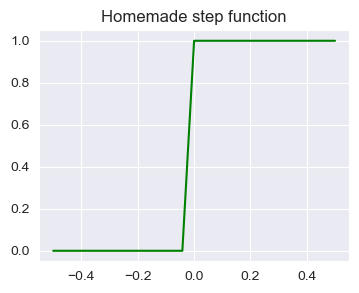

In [27]:
plt.figure(figsize=(4,3))
plt.title("Homemade step function")
plt.plot(y, s, color="green")
plt.show()

I hope that now it's clear *why* it's called "step function".

We can clearly see that it does what we expected: it assigns 0 to every value under 0 and 1 to every value over 0.

This is how this function *classifies* stuff; the magic behind the perceptron and the basis of ANN. Based on the input values, it creates a non-linearity that chooses one class or the other.

### Defining a perceptron function

Having our step function ready to go, we can define the perceptron itself.

It shoud take an array of inputs and weights, perform a dot product betweent them, add the bias and, finally, return the step function to its output.

Let's write the code.


In [28]:
def perceptron(inputs: np.array, weights: np.array, bias: float) -> float:
  # Performs the dot product of inputs and weights, adds bias
  # Returns step function of the total
  total = np.dot(weights, inputs) + bias
  return step_function(total)

We choose some inputs and weights to pass to our perceptron.

The inputs would be the real data from our dataset and the weights are normally initialized with small random numbers or zeroes.

In [29]:
inputs = np.array([2, 1, 0.5])       # x1 = 2, x2 = 3
weights = np.array([0.1, 0.2, 0.1]) # w1 = 0, w2 = 1
bias = 1

And, finally, pass all of these elements to the perceptron function we defined above and get its class "prediction".

In [30]:
print("The inputs correspond to class:", perceptron(inputs, weights, bias))    # 1.0

The inputs correspond to class: 1.0


Try it out generating random numbers for inputs and weights and see if the prediction changes!

In [31]:
inputs = np.random.randint(-5, 5, 4)
print(inputs)
weights = np.random.rand(1, 4)
print(weights)

print("The inputs correspond to class:", perceptron(inputs, weights, bias))

[ 4 -2  2  3]
[[0.42594472 0.68170372 0.92845514 0.64431231]]
The inputs correspond to class: 1.0


### Defining a "Neuron"

So far we have defined a couple of functions that, together, make a basic algorithm. 

As the next step we should write a python class named "Neuron" that:
 - Initializes with the weights and bias
 - Takes inputs that go through a **feedforward** method (the same a the Perceptron algorithm that we defined above)
 - The feedforward method performs the **dot product** and returns the output of the **step function**

In [32]:
class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias

  def step_function(self, z):
    return 1.0 if z >= 0 else 0.0

  def feedforward(self, inputs):
    total = np.dot(self.weights, inputs) + self.bias
    return step_function(total)

In [33]:
inputs = np.array([2, 1, 0.5])       # x1 = 2, x2 = 3
weights = np.array([0.1, 0.2, 0.1]) # w1 = 0, w2 = 1
bias = 1

In [34]:
neuron = Neuron(weights, bias)
print("Prediction for Neuron: ", neuron.feedforward(inputs))  

Prediction for Neuron:  1.0


Again, we can test it with random values to see how the prediction varies.

In [35]:
inputs = np.random.randint(-5, 5, 4)
print(inputs)
weights = np.random.rand(1, 4)
print(weights)

neuron = Neuron(weights, bias)
print("Prediction for Neuron: ", neuron.feedforward(inputs))  

[-5 -5 -3  0]
[[0.07716416 0.58521324 0.64902357 0.35017802]]
Prediction for Neuron:  0.0


## **Multilayer Perceptron**

Due to its simple nature, a single Perceptron algorithm only works with linearly separable data.

<img src="images/Linearly_Separable_Data_Example.webp">

To tackle this problem, we can combine perceptrons (neurons) assembling them into networks. 

The simplest architecture of an Artificial Neural Network is a Multilayer Perceptron, where each layer's output is the input of the following layer, and all of the nodes (neurons) of one layer are connected to all the neurons of the following one. This is also known as a fully connected or dense layer; we'll talk more about them in the following tutorials.



<img src="images/multilayer_perceptron.png" width="500">




We create a neural network (combination of perceptrones) with:
 - two inputs
 - one hidden layer with two neurons (h1, h2)
 - one output layer with one neuron (o1)
 
Each Neuron has the same weights and biases:
 - w = [0, 1]
 - b = 0


In [36]:
class MultilayerPerceptron():

  def __init__(self):
    weights = np.array([0, 1])
    bias = 0

    # The Neuron class that we define above
    self.h1 = Neuron(weights, bias)
    self.h2 = Neuron(weights, bias)
    self.o1 = Neuron(weights, bias)

  def feedforward(self, x):
    out_h1 = self.h1.feedforward(x)
    out_h2 = self.h2.feedforward(x)

    # The inputs for o1 are the outputs of h1 and h2
    out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))

    return out_o1


It's important to clarify that this might not be the best way to write this function; it is done this way for clarity regarding the architecture of the network.

Also, if we need to use a neural network for a real-world problem, we will never write it from scratch by ourselves; we will use saved models or pretrained networks. We will work with this kind of algorithms in the following tutorials.

In [37]:
network = MultilayerPerceptron()

In [42]:
inputs = np.array([2, 3])

In [43]:
print("The prediction of the network is: ", network.feedforward(inputs))

The prediction of the network is:  1.0


## Training

So far we have defined the most basic structure of a neural network but, did our algorithm learn anything? Not yet! 

The network we made was not trained, we just passed inputs and asked the network what it thought, but we never checked if the answers were correct.

For this next step, the training of the network, we should define a loss function (error between prediction and real value).

*Training* itself means that the network should minimize its loss function by finding the best weights through multiple iterations of feedforward and **backpropagation**.

We use a method called Gradient Descent to optimise weights and biases that minimise the loss function.

<img src="images/backpropagation.avif" width="500">

Even though the details of the Gradient Descent method go beyond the scope of this tutorial, I recommend [StaQuest's video about it](https://www.youtube.com/watch?v=sDv4f4s2SB8&ab_channel=StatQuestwithJoshStarmer) if you are interested to understand how it works.

### Bibliography

Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition. O'Reilly Media, Inc.

Bishop, C. (2006). Patter Recognition and Machine Learning. Springer New York, NY.

Nielsen, M. (2015), Neural Networks and Deep Learning, Determination Press.

StatQuest Gradient Descent: https://www.youtube.com/watch?v=sDv4f4s2SB8

Verma, S. (April, 2021), Implementing the Perceptron Algorithm in Python. Towards Data Science. https://towardsdatascience.com/perceptron-algorithm-in-python-f3ac89d2e537

Zhou, V. (March, 2019), Machine Learning for Beginners: An Introduction to Neural Networks, Towards Data Science. https://towardsdatascience.com/machine-learning-for-beginners-an-introduction-to-neural-networks-d49f22d238f9

Bento, C. (September 2021), Multilayer Perceptron Explained with a Real-Life Example and Python Code: Sentiment Analysis, Towards Data Science. https://towardsdatascience.com/multilayer-perceptron-explained-with-a-real-life-example-and-python-code-sentiment-analysis-cb408ee93141
